In [17]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
import csv
import datetime
import numpy as np
import netCDF4
import ast
#import scipy.stats
#import json

sys.path.append("../../larda")

import pyLARDA
import pyLARDA.helpers as h
import pyLARDA.Transformations as pLTransf


import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

from scipy import stats

import selection_criteria as s_c


/home/martin/.local/lib/python3.6/site-packages/numba/core/errors.py:149: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [4]:
def gen_dt_list(start, end, delta=24):
    l = []
    current = start
    while current <= end:
        l.append(current)
        current = current + datetime.timedelta(hours=delta)
    return l

def print_cloud_props(cloud):
    dt_begin = ts_to_dt(float(cloud['Begin_Date_Unix']))
    dt_end = ts_to_dt(float(cloud['End_Date_Unix']))
    iwc_n = float(cloud['IWC_TOP_N'])
    n_prof = float(cloud['N_Profiles'])
    print(dt_begin.strftime("%Y%m%d-%H%M"), '-', dt_end.strftime("%Y%m%d-%H%M"), ':', 
              "{:>7.1f}".format(float(cloud['CBH'])), "{:>7.1f}".format(float(cloud['CTH'])), 
              "{:>7.2f}".format(float(cloud['CTT'])-273.15), 
              "  {:.2e}".format(float(cloud['IWC_TOP_MED'])), 
              "  {:.2f}".format(iwc_n/n_prof),
             cloud['Cloud_Run'], cloud['Cloud_Type'])


def load_data(filename):
    data = []
    with open(filename, 'r') as f:
    #with open('cloud_collection_LEIPZIG_all.csv', 'r') as f:
        reader = csv.reader(f, delimiter=';')
        header = next(reader)
        for row in reader:
            #data.append(row)
            comp = row[1].replace('_', '')
            if row[0][:14] == comp:
                data.append({k:v for k, v in zip(header, row)})
            else:
                print('corrupted row ', row)
                break
                
    return data

In [5]:
filename = {
    "Pun_larda3": '../cloud_collections/cloud_collection_lacros_dacapo_all.csv',
    "Lim_larda3": '../cloud_collections/cloud_collection_lacros_cycare_all_w_dl.csv',
    "Lei_larda3": '../cloud_collections/cloud_collection_lacros_leipzig_all.csv',
}

clouds_new = load_data(filename['Pun_larda3'])

In [6]:
      
clouds_new_filtered = []
for i, cloud in enumerate(clouds_new[:]):
    ffcloud = lambda s: float(cloud[s])
    
    dt_begin = h.ts_to_dt(ffcloud('Begin_Date_Unix'))
    dt_end = h.ts_to_dt(ffcloud('End_Date_Unix'))
    duration = dt_end-dt_begin
    #conds = s_c.conditions_ice_wo_CTH(cloud)
    conds = s_c.standard(cloud)

    if all(conds[::2]):
        clouds_new_filtered.append(cloud)

print(len(clouds_new_filtered))

1267


In [7]:
start = datetime.datetime(2018,11,28)
end = datetime.datetime(2020,12,31)

def filterfunc(dt, c):
    ffcloud = lambda s: float(c[s])
    dt_begin = h.ts_to_dt(ffcloud('Begin_Date_Unix'))
    
    return dt < dt_begin < dt+datetime.timedelta(minutes=23*60+59)


sorted_day = {}

for dt in gen_dt_list(start, end):
    
    new_today = [c for c in clouds_new_filtered if filterfunc(dt, c)]
    
    if len(new_today) > 0:
        print(dt.strftime("%Y%m%d"), f" clouds {len(new_today):2.0f} ")
        #print(new_today)
        sorted_day[dt.strftime("%Y%m%d")] = {'clouds': new_today}

20181128  clouds  3 
20181129  clouds  1 
20181130  clouds  3 
20181201  clouds  1 
20181202  clouds  1 
20181204  clouds  6 
20181205  clouds  4 
20181206  clouds  1 
20181207  clouds  1 
20181208  clouds  2 
20181209  clouds  7 
20181211  clouds  3 
20181212  clouds  2 
20181213  clouds  1 
20181214  clouds  3 
20181217  clouds  3 
20181218  clouds  8 
20181219  clouds  1 
20181220  clouds  6 
20181222  clouds  1 
20181223  clouds  1 
20181225  clouds  2 
20181226  clouds  7 
20181227  clouds  5 
20181228  clouds  1 
20181229  clouds  3 
20181230  clouds  1 
20181231  clouds  2 
20190102  clouds  5 
20190103  clouds  3 
20190104  clouds  9 
20190105  clouds  2 
20190106  clouds  5 
20190108  clouds  2 
20190109  clouds  3 
20190111  clouds  3 
20190112  clouds  2 
20190113  clouds  6 
20190114  clouds  2 
20190116  clouds  3 
20190117  clouds  4 
20190118  clouds  5 
20190120  clouds  2 
20190121  clouds  5 
20190122  clouds  1 
20190123  clouds  4 
20190126  clouds  5 
20190127  clo

20201214  clouds  1 
20201215  clouds  3 
20201217  clouds  3 
20201218  clouds  4 
20201219  clouds  4 
20201220  clouds  2 
20201221  clouds  4 
20201222  clouds  2 
20201225  clouds  2 
20201226  clouds  2 
20201229  clouds  6 
20201230  clouds  1 
20201231  clouds  1 


In [8]:
larda_rsd2 = pyLARDA.LARDA('remote', uri="http://larda3.tropos.de")

larda_rsd2.connect('lacros_dacapo')

{'campaign_list': ['lacros_dacapo', 'lacros_cycare', 'lacros_leipzig', 'polly_arielle_leipzig', 'polly_ift_leipzig', 'lacros_accept', 'davos', 'mosaic', 'oceanet_atlantic', 'oceanet_pascal', 'arm_baecc', 'pollyxt_tropos_cadex', 'pollyxt_tropos_haifa', 'trace_leipzig']}
AIRMASS_SOURCE ['landsfc_below2km', 'landsfc_below5km', 'landsfc_belowmd', 'lat_below2km', 'lat_below5km', 'lat_belowmd', 'region_below2km', 'region_below5km', 'region_belowmd']
AIRMASS_SOURCE_FLEX ['landsfc_below2km', 'lat_below2km', 'region_below2km']
CEILOMETER ['beta', 'cbh', 'pbl', 'rc', 'sky_cond']
CLOUDNET ['CLASS', 'IWC', 'LDR', 'LWC', 'LWC_S', 'LWP', 'P', 'T', 'UWIND', 'VEL', 'VWIND', 'WIDTH', 'Z', 'beta', 'depol', 'q', 'rainrate']
HATPRO ['ABSH', 'IWV', 'LWP', 'T', 'flag']
MIRA ['LDRg', 'LDRspec', 'LDRspec_old', 'SNRCorFac', 'SNRco', 'SNRg', 'VELg', 'Ze', 'Zg', 'Zmie', 'Zspec', 'Zspec_old', 'hor_wind_u', 'hor_wind_u_fit', 'hor_wind_v', 'hor_wind_v_fit', 'noise_co', 'noiseco', 'noisecx', 'npw1', 'ppi_VELg', 'ppi

In [18]:
dt = datetime.datetime(2018,11,28)
# dt = datetime.datetime(2019,1,2)
# dt = datetime.datetime(2019,10,22)
# dt = datetime.datetime(2019,10,5)
#[dt, dt+datetime.timedelta(minutes=23*60+59)]

cases = {
    "20181128": {'time_interval': [datetime.datetime(2018,11,28, 0, 20), 
                                   datetime.datetime(2018,11,28, 9, 0)],
                 'range_interval': [2100, 5200]}
    
}


case = cases["20181128"]


cloudnet_class = larda_rsd2.read("CLOUDNET", "CLASS", case['time_interval'], case['range_interval'])
cloudnet_Z = larda_rsd2.read("CLOUDNET", "Z", case['time_interval'], case['range_interval'])
cloudnet_beta = larda_rsd2.read("CLOUDNET", "beta", case['time_interval'], case['range_interval'])

cloudnet_VEL = larda_rsd2.read("CLOUDNET", "VEL", case['time_interval'], case['range_interval'])
shaun_VEL = larda_rsd2.read("SHAUN", "VEL", case['time_interval'], case['range_interval'])


T = larda_rsd2.read("CLOUDNET","T", case['time_interval'], case['range_interval'])
def toC(datalist):
    return datalist[0]['var']-273.15, datalist[0]['mask']
T = pyLARDA.Transformations.combine(toC, [T], {'var_unit': "C"})


223kB [00:00, 1.22MB/s]                           
1.02MB [00:00, 2.53MB/s]                           
1.02MB [00:00, 2.72MB/s]                           
1.02MB [00:00, 2.16MB/s]                           
9.31MB [00:01, 5.70MB/s]                            
155kB [00:00, 1.35MB/s]                           


2:21:29.999628 1340.7057
0:45:29.999543 779.4799999999996
1:16:00.000801 374.1505000000002


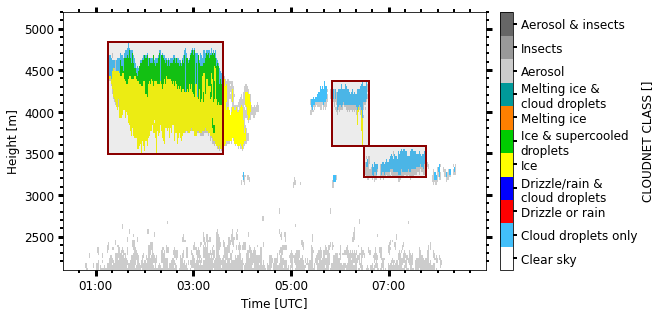

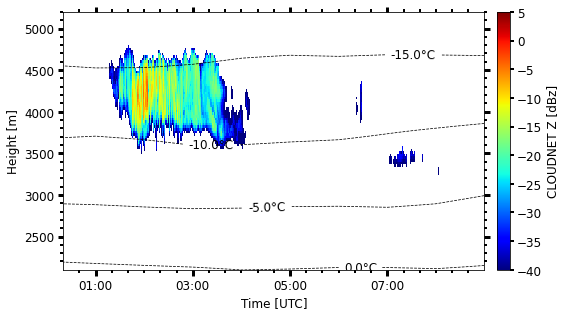

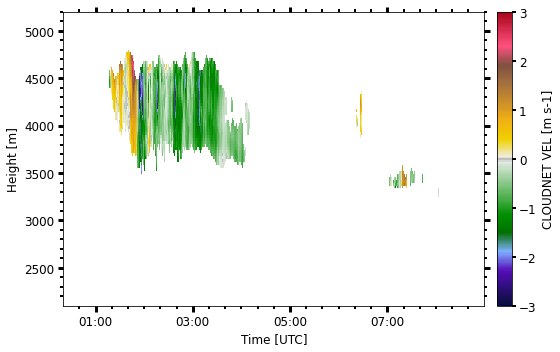

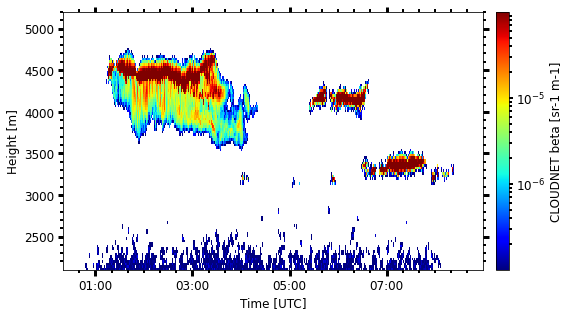

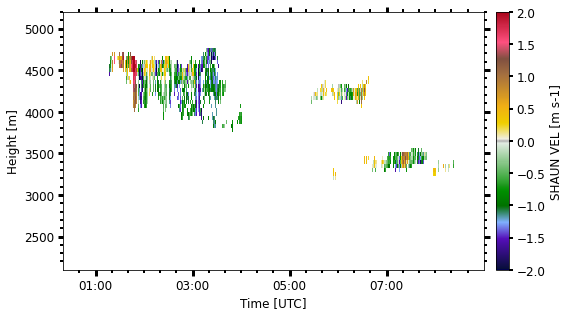

In [19]:
def set_interval(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=2))
    ax.xaxis.set_minor_locator(matplotlib.dates.MinuteLocator(byminute=np.arange(0,60,20)))
    
    return ax


fig, ax = pyLARDA.Transformations.plot_timeheight2(
    cloudnet_class, 
    range_interval=case['range_interval'], figsize=[8,4.5])
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1000))

from matplotlib import patches
for c in sorted_day[dt.strftime("%Y%m%d")]['clouds']:
    dt_begin = h.ts_to_dt(float(c['Begin_Date_Unix']))
    dt_end = h.ts_to_dt(float(c['End_Date_Unix']))
    cbh = float(c['CBH'])
    cth = float(c['CTH'])
    
    duration = dt_end - dt_begin
    height = cth-cbh
    print(duration, height)
    rect = patches.Rectangle(
            (dt_begin,cbh),duration,height,linewidth=2,
            edgecolor='none',facecolor='grey', alpha=0.15,
            )
    ax.add_patch(rect)
    rect = patches.Rectangle(
            (dt_begin,cbh),duration,height,linewidth=2,
            edgecolor='darkred',facecolor='none'
            )
    ax.add_patch(rect)
    
ax = set_interval(ax)
savename =  "../plots/case/{}_cloudnet_class.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250)

contour = {'data': T, 'levels': np.arange(-40,11,5)}

cloudnet_Z['var_lims'] = [-40, 5]
cloudnet_Z['colormap'] = 'jet'
fig, ax = pyLARDA.Transformations.plot_timeheight2(
    cloudnet_Z, range_interval=case['range_interval'],
    contour=contour,
    z_converter="lin2z", figsize=[8,4.5])
ax = set_interval(ax)
savename =  "../plots/case/{}_cloudnet_Z.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250)


fig, ax = pyLARDA.Transformations.plot_timeheight2(
    cloudnet_VEL, range_interval=case['range_interval'], 
    figsize=[8,5])
ax = set_interval(ax)
savename =  "../plots/case/{}_cloudnet_VEL.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250)


cloudnet_beta['colormap'] = 'jet'
fig, ax = pyLARDA.Transformations.plot_timeheight2(
    cloudnet_beta, range_interval=case['range_interval'], 
    z_converter="log", figsize=[8,4.5])
ax = set_interval(ax)
savename =  "../plots/case/{}_cloudnet_beta.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250)

fig, ax = pyLARDA.Transformations.plot_timeheight2(
    shaun_VEL, range_interval=case['range_interval'], 
    figsize=[8,4.5])
ax = set_interval(ax)
savename =  "../plots/case/{}_shaun_VEL.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250)

/home/martin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))


no cases  3 3
2


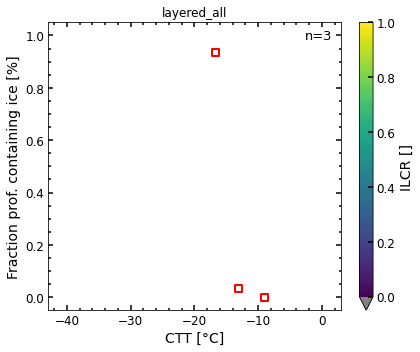

In [20]:
ctt = np.array([float(d['CTT']) for d in sorted_day[dt.strftime("%Y%m%d")]['clouds']])
ctt[ctt == 0.0] = np.nan
frac_prof_ice = np.array([float(d['IWC_TOP_N'])/float(d['N_Profiles']) for d in sorted_day[dt.strftime("%Y%m%d")]['clouds']])
ilcr = np.array([float(d['ILCR_MED']) for d in sorted_day[dt.strftime("%Y%m%d")]['clouds']])
ilcr[ilcr == 0.0] = 1e-50


fig, ax = plt.subplots(figsize=(6, 5))
# ax.set_facecolor('lightgrey')
# sc = ax.scatter(ctt-273.15, frac_prof_ice, s=12,
#                 #label=trace_geo_names[int(elem)],
#                 norm=matplotlib.colors.LogNorm(vmin=5e-5,vmax=2e-1),
#                 #vmin=-0.5, vmax=0.5,
#                 c=ilcr, cmap='plasma_r'
#                )
sc = ax.scatter(ctt-273.15, frac_prof_ice,
                marker='s', facecolors='none', edgecolors='r',
                s=50, linewidth=2,
               )
sc.cmap.set_under('grey')
cbar = fig.colorbar(sc, extend='min')
cbar.ax.set_ylabel('ILCR []', fontsize=14)
cbar.ax.tick_params(axis='y', which='major', direction='in',
                     right=True,
                     width=1.5, length=5, labelsize=12)
ax.set_xlabel('CTT [°C]', fontsize=14)
ax.set_ylabel('Fraction prof. containing ice [%]', fontsize=14)
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([-43, 3])

print('no cases ', len(sorted_day[dt.strftime("%Y%m%d")]['clouds']), ctt[~np.isnan(ctt)].shape[0])

print(np.sum(frac_prof_ice > 1e-50))

ax.set_title('layered_all')
ax.text(0.97, 0.94, 'n={}'.format(ctt[~np.isnan(ctt)].shape[0]), horizontalalignment='right',
        #verticalalignment='bottom', 
        transform=ax.transAxes, color='k', fontsize=13)


ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='both', which='major', direction='in',
               top=True, right=True,
               width=1.5, length=5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', 
               top=True, right=True,
               width=1.5, length=2.5)
#ax.legend(fontsize=11)
plt.tight_layout()
# fname = '../plots/{}_frac_profiles_ilcr_{}.png'.format(camp, 'layered_all')
# plt.savefig(fname, dpi=250)

savename =  "../plots/case/{}_ctt_frac_location.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250, transparent=True)

201811280115154492 -16.62  14.54 |  72.1  343.0  150.0 1680.0 |  5  146.82
201811280550154243 -13.05  14.40 |  39.3  187.1   58.5  510.0 |  1   29.10
201811280630143401  -9.05  13.63 |  61.3  187.1   62.4  810.0 |  4  110.15
201811280115154492 -16.62  14.54 |  72.1  343.0  150.0 1680.0 |  5  146.82
201811280550154243 -13.05  14.40 |  39.3  187.1   58.5  510.0 |  1   29.10
201811280630143401  -9.05  13.63 |  61.3  187.1   62.4  810.0 |  4  110.15


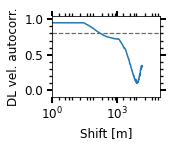

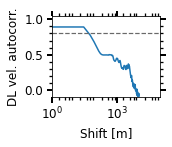

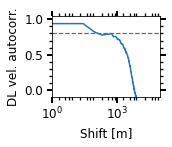

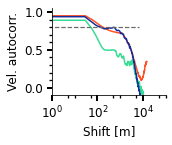

In [21]:
hvel_corr = True
toarray = lambda s: np.array(ast.literal_eval(s))

for cloud in sorted_day[dt.strftime("%Y%m%d")]['clouds']:
    
    fig, ax = plt.subplots(figsize=[2.5, 2.1])

    ctt = float(cloud['CTT'])-273.15
    if hvel_corr:
        vel = max(float(cloud['VEL']),0.1)
    else:
        vel = 1

    autocor_time = toarray(cloud['v_dl_autocor_time'])
    autocor_coeff = toarray(cloud['v_dl_autocor_coeff'])
        
    autocorr_lt_thres = np.where(autocor_coeff > 0.8)[0]
    i_above_thres = autocorr_lt_thres[-1] if len(autocorr_lt_thres) > 0 else 0
    autocorr_at_thres = autocor_time[i_above_thres]*vel if len(autocor_time) > 0 else 0
        
    cth_std = float(cloud['CTH_STD'])
    thick_med = float(cloud['Cloud_Thickness_MED'])
    thick_std = float(cloud['Cloud_Thickness_STD'])
    ct_ac = float(cloud['CTH_autocorr_08_time'])

    print(f"{cloud['A_Unique_Identifier']:>18} {ctt:6.2f} {vel:6.2f} |\
{cth_std:6.1f} {thick_med:6.1f} {thick_std:6.1f} {ct_ac:6.1f} |\
{i_above_thres:3} {autocorr_at_thres:7.2f}")
    
    ax.plot(autocor_time*vel, autocor_coeff, 
            linewidth=1.5)

    ax.axhline(0.8, linewidth=1.2, color='dimgrey', linestyle='--')
    ax.set_xscale('log')
    

    if hvel_corr:
        ax.set_xlim([1e0, 1e5])
        ax.set_xlabel('Shift [m]', fontsize=12)
    else:
        ax.set_xlim([1e0, 3e3])
        ax.set_xlabel('Shift [s]', fontsize=12)
    ax.set_ylabel('DL vel. autocorr.', fontsize=12)
    ax.set_ylim([-0.1, 1.05])

    #ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.tick_params(axis='both', which='major', top=True, right=True,
                   width=1.5, length=4, labelsize=11)
    ax.tick_params(axis='both', which='minor', top=True, right=True,
                   width=1.5, length=2.5)
    #ax.legend(fontsize=12)
    ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12))
    ax.tick_params(axis='both', which='both', right=True, top=True)
    ax.tick_params(axis='both', which='major', labelsize=12,
                   width=2, length=5.5)
    ax.tick_params(axis='both', which='minor', width=1.3, length=3)
    
    fig.tight_layout()
    savename =  "../plots/case/{}_shaun_autocorr_VEL.png".format(cloud['A_Unique_Identifier'])
    fig.savefig(savename, dpi=250)
    
  

fig, ax = plt.subplots(figsize=[2.5, 2.1])
colors = ['darkorange', 'lightseagreen', 'royalblue']
colors = ['#FF5126', '#37DC94', '#162C9B']

for i, cloud in enumerate(sorted_day[dt.strftime("%Y%m%d")]['clouds']):
    
    ctt = float(cloud['CTT'])-273.15
    if hvel_corr:
        vel = max(float(cloud['VEL']),0.1)
    else:
        vel = 1

    autocor_time = toarray(cloud['v_dl_autocor_time'])
    autocor_coeff = toarray(cloud['v_dl_autocor_coeff'])
        
    autocorr_lt_thres = np.where(autocor_coeff > 0.8)[0]
    i_above_thres = autocorr_lt_thres[-1] if len(autocorr_lt_thres) > 0 else 0
    autocorr_at_thres = autocor_time[i_above_thres]*vel if len(autocor_time) > 0 else 0
        
    cth_std = float(cloud['CTH_STD'])
    thick_med = float(cloud['Cloud_Thickness_MED'])
    thick_std = float(cloud['Cloud_Thickness_STD'])
    ct_ac = float(cloud['CTH_autocorr_08_time'])

    print(f"{cloud['A_Unique_Identifier']:>18} {ctt:6.2f} {vel:6.2f} |\
{cth_std:6.1f} {thick_med:6.1f} {thick_std:6.1f} {ct_ac:6.1f} |\
{i_above_thres:3} {autocorr_at_thres:7.2f}")
    
    ax.plot(autocor_time*vel, autocor_coeff, 
            linewidth=1.5, color=colors[i])

ax.plot([1e-1,7e3], [0.8, 0.8],
           linewidth=1.2, color='dimgrey', linestyle='--')
ax.set_xscale('log')


if hvel_corr:
    ax.set_xlim([1e0, 1e5])
    ax.set_xlabel('Shift [m]', fontsize=12)
else:
    ax.set_xlim([1e0, 3e3])
    ax.set_xlabel('Shift [s]', fontsize=12)
ax.set_ylabel('Vel. autocorr.', fontsize=12)
ax.set_ylim([-0.1, 1.05])

#ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.tick_params(axis='both', which='major', top=True, right=True,
               width=1.5, length=4, labelsize=11)
ax.tick_params(axis='both', which='minor', top=True, right=True,
               width=1.5, length=2.5)
#ax.legend(fontsize=12)
ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10.0,subs=(0.5,1), numticks=100))
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(base=100.0, subs=(1.0,), numticks=100))
ax.tick_params(axis='both', which='both', right=True, top=True)
ax.tick_params(axis='both', which='major', labelsize=12,
               width=2, length=5.5)
ax.tick_params(axis='both', which='minor', width=1.3, length=3)

# hide top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()
savename =  "../plots/case/{}_DL_combined_autocorr.png".format(dt.strftime('%Y%m%d'))
fig.savefig(savename, dpi=250, transparent=True)
